In [47]:
import numpy as np
import pandas as pd

import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
mail = pd.read_csv("/content/spam_mail.csv")

In [6]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
mail.shape

(5572, 2)

In [9]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
mail.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
mail["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [12]:
#for imbalnace dataset

spam_mail = mail[mail["Category"] == "spam"]
spam_mail.shape

(747, 2)

In [13]:
ham_mail = mail[mail["Category"] == "ham"]
ham_mail.shape

(4825, 2)

In [14]:
#downsampling
ham_mail_downsampled = ham_mail.sample(spam_mail.shape[0])
ham_mail_downsampled.shape

(747, 2)

In [15]:
balanced_mail = pd.concat([ham_mail_downsampled, spam_mail])
balanced_mail.shape

(1494, 2)

In [16]:
balanced_mail["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [17]:
balanced_mail["spam"]= balanced_mail["Category"].apply(lambda x: 1 if x == "spam" else 0)

In [18]:
balanced_mail.head()

,Category,Message,spam
1713,ham,o turns out i had stereo love on mi phone unde...,0
2710,ham,Sorry de i went to shop.,0
2195,ham,Hi my email address has changed now it is,0
2617,ham,I went to ur hon lab but no one is there.,0
494,ham,What class of &lt;#&gt; reunion?,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(balanced_mail["Message"], balanced_mail["spam"], stratify = balanced_mail["spam"])

In [21]:
X_train

2498    Dai what this da.. Can i send my resume to thi...
3978    Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5253    Please tell me not all of my car keys are in y...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
                              ...                        
1632    We not watching movie already. Xy wants 2 shop...
3163    I can't describe how lucky you are that I'm ac...
1172    Got what it takes 2 take part in the WRC Rally...
2670    we tried to contact you re your response to ou...
775                            Just sleeping..and surfing
Name: Message, Length: 1120, dtype: object

In [22]:
(X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape)

((1120,), (374,), (1120,), (374,))

In [24]:
#BERT

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [28]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)["pooled_output"]

get_sentence_embeding([
    "Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt T&Cs"])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.6123501 , -0.482137  , -0.87848604,  0.5980504 ,  0.59811085,
        -0.07280164,  0.40181652,  0.30108616, -0.4662837 , -0.9997978 ,
        -0.1132388 ,  0.49869832,  0.93101317,  0.47813484,  0.68618363,
        -0.2592154 ,  0.27187848, -0.52464575,  0.27682275,  0.4928461 ,
         0.7133292 ,  0.99997693,  0.21463175,  0.24121259,  0.42285696,
         0.7849424 , -0.5601265 ,  0.81538534,  0.8817638 ,  0.5643824 ,
        -0.33674332,  0.30906993, -0.9703275 , -0.29241475, -0.95908654,
        -0.9634967 ,  0.3363918 , -0.43941614, -0.02885796,  0.0585218 ,
        -0.7932109 ,  0.27494124,  0.99959886, -0.07146687,  0.50808215,
        -0.13033211, -0.99999046,  0.1307321 , -0.71887124,  0.58698654,
         0.59632367,  0.5042602 ,  0.12388559,  0.4103922 ,  0.3274961 ,
        -0.04672855,  0.02983662,  0.15409653, -0.23976402, -0.5121526 ,
        -0.5679202 ,  0.4783342 , -0.8182714 , -0.76081115,  0.6196656 ,
 

In [30]:
#embedding vectors & checking cosine similarity

words = get_sentence_embeding([
    "peacock",
    "kingfisher",
    "isro",
    "nasa",
    "elon musk",
    "mark zuckerberg",
    "mango",
    "apple"])

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([words[0]],[words[1]])

array([[0.91698015]], dtype=float32)

In [36]:
cosine_similarity([words[1]],[words[6]])

array([[0.8546828]], dtype=float32)

In [37]:
cosine_similarity([words[6]],[words[7]])

array([[0.9614041]], dtype=float32)

In [38]:
cosine_similarity([words[4]],[words[5]])

array([[0.9873769]], dtype=float32)

In [39]:
#model building

#bert layers
input_text = tf.keras.layers.Input(shape=(), dtype = tf.string, name = "text")
preprocessed_text = bert_preprocess(input_text)
outputs = bert_encoder(preprocessed_text)

#neural network layers
l = tf.keras.layers.Dropout(0.1, name = "dropout")(outputs["pooled_output"])
l = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(l)

#using inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[input_text], outputs = [l])

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [42]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name = "accuracy"),
      tf.keras.metrics.Precision(name = "precision"),
      tf.keras.metrics.Recall(name = "recall")
]

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = METRICS)

In [44]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 641s 18s/step - loss: 0.5349 - accuracy: 0.7795 - precision: 0.7712 - recall: 0.7946
Epoch 2/10
35/35 [==============================] - 638s 18s/step - loss: 0.4504 - accuracy: 0.8259 - precision: 0.8007 - recall: 0.8679
Epoch 3/10
35/35 [==============================] - 640s 18s/step - loss: 0.3988 - accuracy: 0.8705 - precision: 0.8584 - recall: 0.8875
Epoch 4/10
35/35 [==============================] - 655s 19s/step - loss: 0.3693 - accuracy: 0.8643 - precision: 0.8481 - recall: 0.8875
Epoch 5/10
35/35 [==============================] - 662s 19s/step - loss: 0.3500 - accuracy: 0.8813 - precision: 0.8752 - recall: 0.8893
Epoch 6/10
35/35 [==============================] - 661s 19s/step - loss: 0.3263 - accuracy: 0.8902 - precision: 0.8761 - recall: 0.9089
Epoch 7/10
35/35 [==============================] - 664s 19s/step - loss: 0.3151 - accuracy: 0.8973 - precision: 0.8924 - recall: 0.9036
Epoch 8/10
35/35 [=======================

In [45]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 223s 18s/step - loss: 0.2360 - accuracy: 0.9439 - precision: 0.9192 - recall: 0.9733


[0.23600952327251434,
 0.9438502788543701,
 0.9191918969154358,
 0.9732620120048523]

In [46]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 222s 18s/step


In [48]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [49]:
cmatrix = confusion_matrix(y_test, y_predicted)
cmatrix

array([[171,  16],
       [  5, 182]])

Text(50.722222222222214, 0.5, 'truth_value')

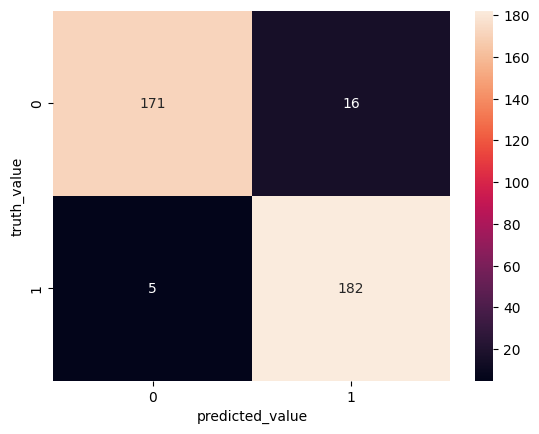

In [50]:
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("predicted_value")
plt.ylabel("truth_value")

In [51]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       187
           1       0.92      0.97      0.95       187

    accuracy                           0.94       374
   macro avg       0.95      0.94      0.94       374
weighted avg       0.95      0.94      0.94       374



In [54]:
reviews = [
    "Yup... Ok i go home look at the timings then i msg Ã¼ again... Xuhui going to learn on 2nd may too but her lesson is at 8am",
    "07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow",
    "U can call me now...",
    "URGENT! Your Mobile No. was awarded Â£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U! Call from Landline 09064019788 BOX42WR29C, 150PPM",
    "No no. I will check all rooms befor activities"
]
model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.6279901 ],
       [0.97037286],
       [0.10159498],
       [0.93965566],
       [0.12724394]], dtype=float32)